In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [235]:
# %cd ./notebooks
lidc_cnnFeatures = pd.read_csv('../data/cnn_features (3).csv',index_col=0)

C:\Users\tzeng1\repos\LIDC_GDRO\notebooks


In [236]:
lidc = pd.read_csv('../data/LIDC_labels.csv')

In [237]:
lidc_cnnFeatures.head()

,nodule_id,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,2691,0.000000,0.000000,0.000000,0.000000,0.213397,1.219989,0.000000,0.000000,0.145907,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.686270,1.748938,0.000000,0.000000,0.000000
1,2185,0.774602,1.016352,0.715805,0.239734,0.758472,1.315181,0.399833,0.083485,0.234024,...,0.002196,0.280764,0.01601,0.078014,0.049616,1.872147,1.109877,0.183929,0.334173,0.002318
2,2190,0.000000,0.000000,0.000000,0.000000,0.582075,1.415442,0.085088,0.000000,0.067842,...,0.000000,0.000000,0.00000,0.000000,0.354359,2.377559,1.842254,0.025743,0.000000,0.000000
3,990,0.001542,0.048578,0.000000,0.000000,0.622260,2.050273,0.006325,0.000000,0.111076,...,0.000000,0.000000,0.00000,0.000000,0.890688,2.450668,2.150176,0.097324,0.003312,0.000000
4,386,0.022453,0.000000,0.007815,0.000000,0.935344,1.723136,0.000000,0.000000,1.313148,...,0.000000,0.000000,0.00000,0.048206,0.792891,2.355183,2.552083,0.145568,0.000000,0.000000


In [238]:
X = lidc_cnnFeatures.drop(columns=['nodule_id']).values
pca_512 = PCA(n_components=512, random_state=4)
pca_512.fit(X)

PCA(n_components=512, random_state=4)

Text(0, 0.5, 'Cumulative Explained Variance')

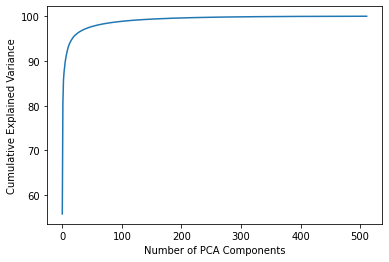

In [239]:
cum_component_variance = np.cumsum(pca_512.explained_variance_ratio_*100)
plt.plot(cum_component_variance)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')

In [240]:
cum_component_variance[10]

93.13911874625937

In [241]:
pca_10 = PCA(n_components=10, random_state=4)
pca_10.fit(X)
X_pca = pca_10.transform(X)

In [242]:
X_embedded = TSNE(n_components=2, random_state=4).fit_transform(X)

C:\Users\tzeng1\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tzeng1\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [243]:
malignancy = [int(lidc[lidc['noduleID'] == id]['malignancy'] > 3) for id in lidc_cnnFeatures['nodule_id']]

In [244]:
lidc_TSNE = pd.DataFrame()
lidc_TSNE['component_1'] = X_embedded[:,0]
lidc_TSNE['component_2'] = X_embedded[:,1]
lidc_TSNE['malignancy'] = malignancy

In [245]:
calcification = [int(lidc[lidc['noduleID'] == id]['calcification'] < 6) for id in lidc_cnnFeatures['nodule_id']]
lidc_TSNE['calcification'] = calcification

In [246]:
lidc_TSNE.groupby(['malignancy', 'calcification']).size()

malignancy  calcification
0           0                636
            1                261
1           0                589
            1                  2
dtype: int64

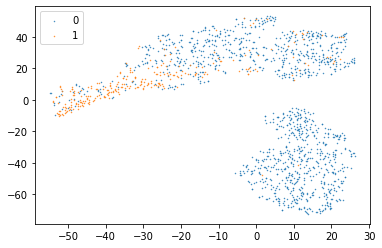

In [248]:
fig, ax = plt.subplots()
group = lidc_TSNE['calcification']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 0.2) #c = legend[g],
ax.legend()
plt.show()

In [249]:
spiculation = [int(lidc[lidc['noduleID'] == id]['spiculation'] > 1) for id in lidc_cnnFeatures['nodule_id']]
lidc_TSNE['spiculation'] = spiculation

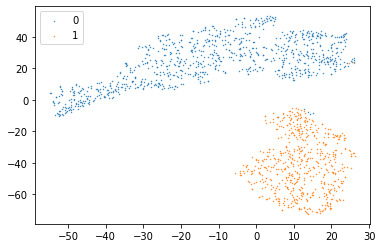

In [250]:
fig, ax = plt.subplots()
group = lidc_TSNE['malignancy']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 0.2) #c = legend[g],
ax.legend()
plt.show()

In [251]:
malig4 = [int(lidc[lidc['noduleID'] == id]['malignancy'] - 1) for id in lidc_cnnFeatures['nodule_id']]
lidc_TSNE['malig4'] = malig4

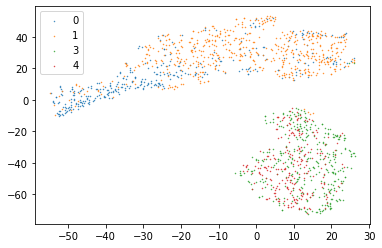

In [252]:
fig, ax = plt.subplots()
group = lidc_TSNE['malig4']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 0.2) #c = legend[g],
ax.legend()
plt.show()

In [253]:
temp = [int(lidc[lidc['noduleID'] == id]['spiculation'] > 1) for id in lidc_cnnFeatures['nodule_id']]
lidc_TSNE['temp'] = temp

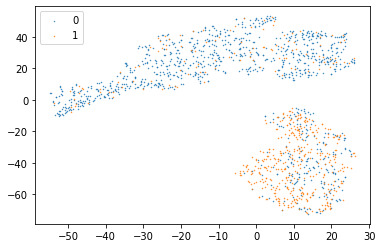

In [254]:
fig, ax = plt.subplots()
group = lidc_TSNE['temp']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 0.2) #c = legend[g],
ax.legend()
plt.show()

#Cluster Handcrafted features

In [143]:
# %cd LIDC_GDRO
from data_util import load_lidc, preprocess_data  


C:\Users\tzeng1\repos\LIDC_GDRO


In [144]:
df = preprocess_data(*load_lidc())

In [146]:
df.head()

,noduleID,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,...,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency,malignancy,subgroup
0,1,2.786989,2.787828,2.621314,2.454225,2.468314,2.096066,2.748694,-0.570518,1.280735,...,-0.941970,1.182771,1.901636,-0.237301,1.094495,0.581531,-0.074923,0.036838,1,marked_malignant
1,2,2.208070,1.860850,1.503739,1.900692,2.116778,2.028013,1.857099,0.368191,-0.184960,...,-0.907012,1.393682,1.579543,-0.063547,1.072152,-1.152443,-0.649761,-0.649261,1,unmarked_malignant
2,3,2.250831,2.167998,2.131948,1.986969,2.143839,1.822497,2.130987,-0.259140,0.917787,...,-0.924491,1.423812,1.802531,-0.247131,1.362616,-0.477880,-0.241693,-0.158040,1,marked_malignant
3,4,-0.281938,-0.308556,-0.169450,-0.131188,-0.112305,-0.035113,-0.254287,0.706877,-0.144326,...,-0.522478,-0.142953,0.150768,-0.268456,-0.201422,-0.460583,-0.305796,-0.298158,1,marked_malignant
4,5,-0.002347,-0.076120,0.004412,0.124439,0.266908,-0.017849,0.457045,-1.040008,-0.500777,...,-0.679787,2.580808,0.481121,-0.107827,2.982511,0.166415,-0.106192,-0.042079,1,unmarked_malignant


In [156]:
feats = df.drop(columns=['noduleID', 'malignancy', 'subgroup']).values
feats_embedded = TSNE(n_components=2, random_state=4).fit_transform(feats)

C:\Users\tzeng1\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tzeng1\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [162]:
f_TSNE = pd.DataFrame()
f_TSNE['component_1'] = feats_embedded[:,0]
f_TSNE['component_2'] = feats_embedded[:,1]
f_TSNE['spiculation'] =  [int(lidc[lidc['noduleID'] == id]['spiculation'] > 1) for id in df['noduleID']]

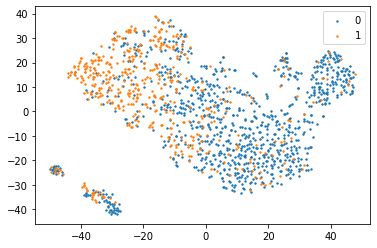

In [163]:
fig, ax = plt.subplots()
group = f_TSNE['spiculation']
component_1 = f_TSNE['component_1'].to_numpy()
component_2 = f_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 2) #c = legend[g],
ax.legend()
plt.show()

In [171]:
f_TSNE = pd.DataFrame()
f_TSNE['component_1'] = feats_embedded[:,0]
f_TSNE['component_2'] = feats_embedded[:,1]
f_TSNE['subgroup'] =  df['subgroup'].replace(['unmarked_benign', 'marked_benign','unmarked_malignant','marked_malignant'],
                        [0, 1,2,3], inplace=False)

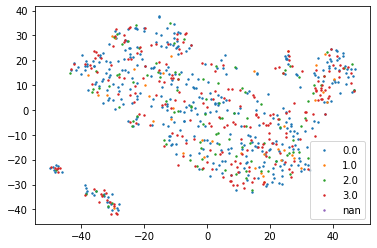

In [172]:
fig, ax = plt.subplots()
group = f_TSNE['subgroup']
component_1 = f_TSNE['component_1'].to_numpy()
component_2 = f_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 2) #c = legend[g],
ax.legend()
plt.show()

#nonbinary clustering

In [255]:
lidc_cnnFeatures_nb = pd.read_csv('../data/cnn_features_nonbinary.csv',index_col=0)
lidc_cnnFeatures_nb.head()

,nodule_id,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,745,0.243546,0.057501,0.067942,2.152513,0.338231,0.559077,0.605111,0.974293,0.397155,...,1.079934,0.662654,1.739000,0.513651,1.277169,0.461113,0.041994,0.196274,0.140482,0.358068
1,1710,0.049085,0.626438,0.011671,2.087344,0.041453,1.677216,0.077726,0.305961,0.248103,...,1.460196,1.669848,1.421879,1.478361,0.362412,0.317035,0.000000,0.371429,0.005394,1.026588
2,582,0.409458,0.029281,0.093145,1.012813,0.000000,1.213256,0.331956,0.000000,0.881690,...,1.230410,2.013180,2.479790,0.850168,0.601853,4.998841,0.000000,0.000000,0.000000,0.132987
3,2272,0.992502,0.000000,0.067836,2.260682,0.004698,0.624481,0.368674,0.768810,0.000000,...,0.715790,0.128435,0.700622,0.876479,1.657265,0.113497,0.059833,1.338324,0.715450,1.591362
4,2667,2.840402,0.312933,0.170272,1.018786,0.039833,1.497198,1.649764,1.282398,0.132180,...,2.246505,0.649839,2.066811,1.097497,0.681480,2.237809,0.133703,2.448350,0.650942,0.375714


In [256]:
X = lidc_cnnFeatures_nb.drop(columns=['nodule_id']).values
X_embedded = TSNE(n_components=2, random_state=4).fit_transform(X)

C:\Users\tzeng1\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tzeng1\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [257]:
malignancy = [int(lidc[lidc['noduleID'] == id]['malignancy'] > 3) for id in lidc_cnnFeatures_nb['nodule_id']]
malignancy_nb = [int(lidc[lidc['noduleID'] == id]['malignancy']) for id in lidc_cnnFeatures_nb['nodule_id']]

In [258]:
lidc_TSNE = pd.DataFrame()
lidc_TSNE['component_1'] = X_embedded[:,0]
lidc_TSNE['component_2'] = X_embedded[:,1]
lidc_TSNE['malignancy'] = malignancy
lidc_TSNE['malignancy_nb'] = malignancy_nb

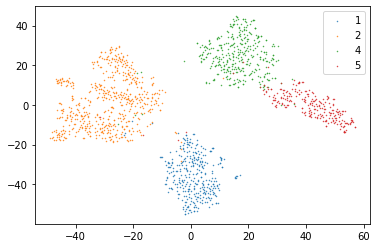

In [259]:
fig, ax = plt.subplots()
group = lidc_TSNE['malignancy_nb']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = .2) #c = legend[g],
ax.legend()
plt.show()

In [260]:
temp = [int(lidc[lidc['noduleID'] == id]['spiculation'] > 1) for id in lidc_cnnFeatures_nb['nodule_id']]
lidc_TSNE['temp'] = temp

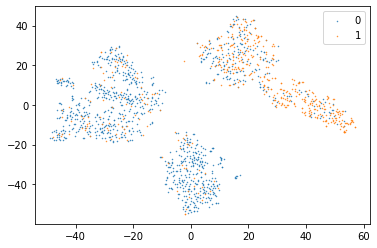

In [261]:
fig, ax = plt.subplots()
group = lidc_TSNE['temp']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = .2) #c = legend[g],
ax.legend()
plt.show()

In [212]:
lidc_TSNE.groupby(['temp', 'malignancy']).size()

temp  malignancy
0     0             870
      1             481
1     0              27
      1             110
dtype: int64